# Audi Price Regression Analysis

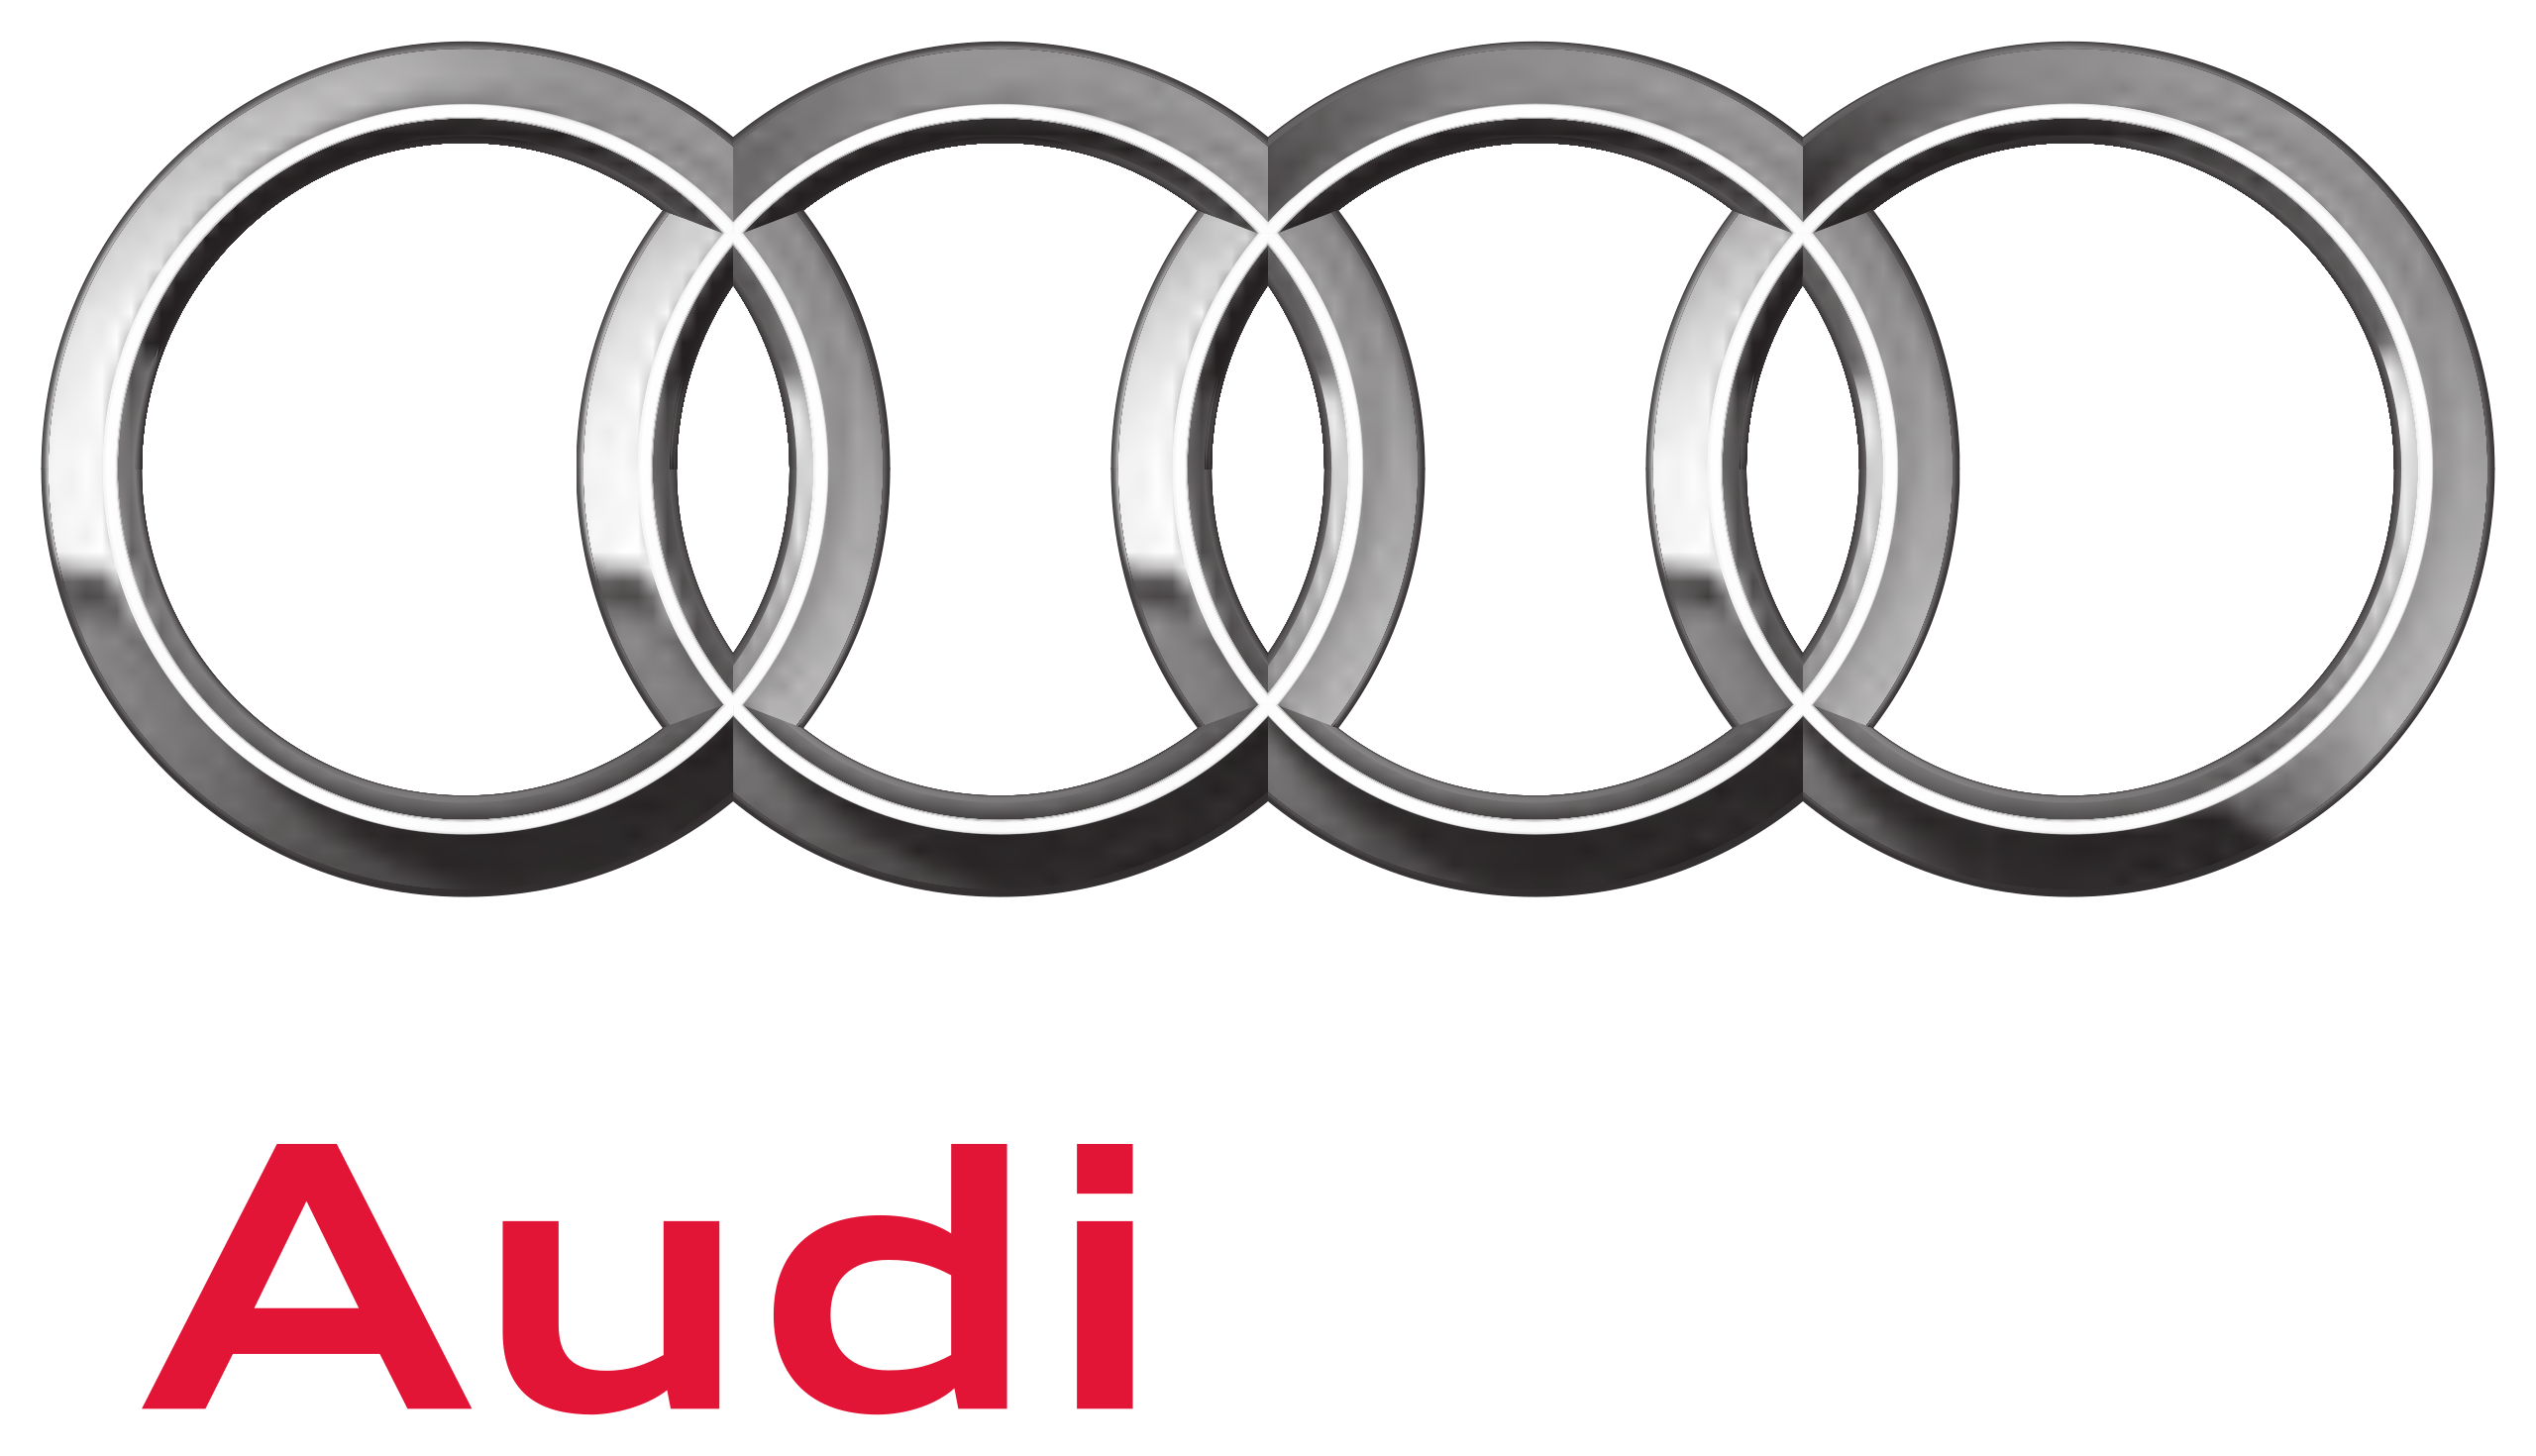

In [8]:
from IPython.display import Image 
pil_img =Image('audi-logo.png',width=400)
display(pil_img)

### Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from time import perf_counter

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

### Loading data

In [10]:
df = pd.read_csv('audi.csv')

### Understanding Data

In [11]:
# The shape of dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (10668, 9)


In [12]:
# Preview of first 5 rows of dataset
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [13]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


### Data Cleaning

In [15]:
# Check for missing values
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [16]:
# Check for duplicate values
df.duplicated().sum()

103

In [19]:
# Drop duplicate observations
df = df.drop_duplicates(keep='first')

### Exploratory Data Analysis

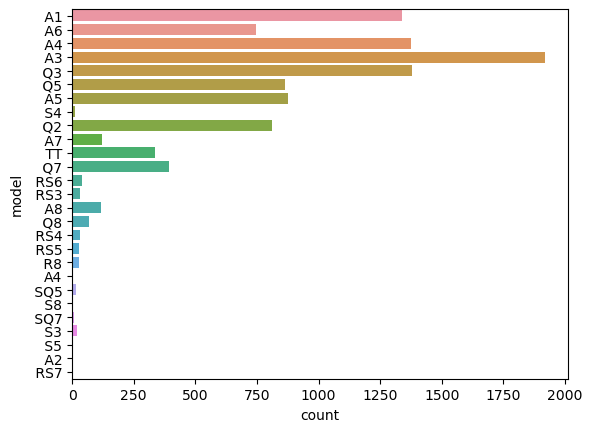

In [20]:
sns.countplot(y = df["model"])
plt.show()

Observation:-  
The Audi A3 is the most common model (which happens to be their entry level vehicle) followed by the Q3 and A4

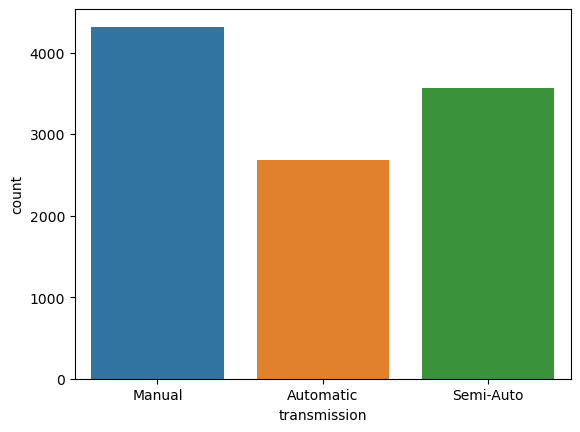

In [21]:
sns.countplot(df["transmission"])
plt.show()

Observation:- 
The most common Audi used is of Manual transmission

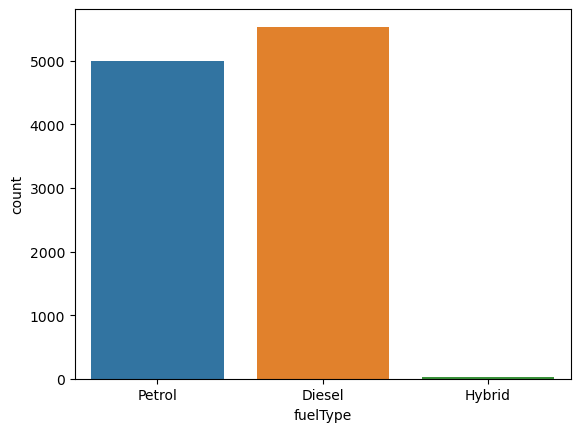

In [22]:
sns.countplot(df["fuelType"])
plt.show()

Observation:- 
The most common Audi used is of Diesel fuel type

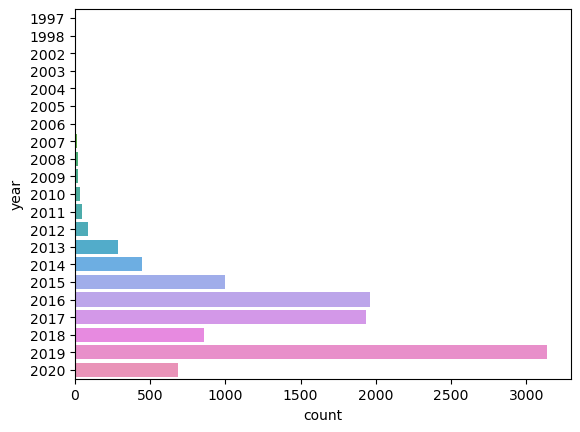

In [23]:
sns.countplot(y = df["year"])
plt.show()

Observation:- 
The most common used Audi for sale was from the year 2019, followed by 2016 and 2017

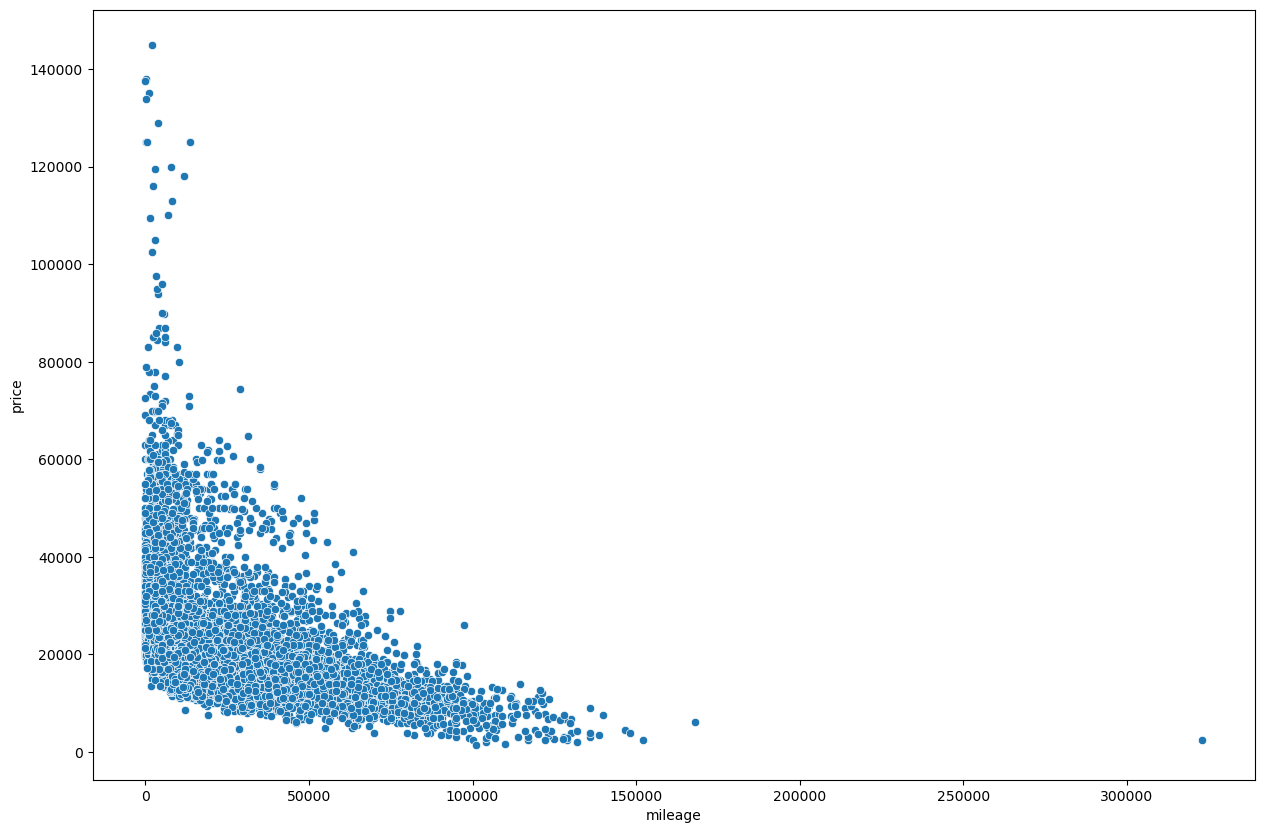

In [25]:
plt.figure(figsize=(15, 10))
sns.scatterplot(df["mileage"], df["price"])
plt.show()

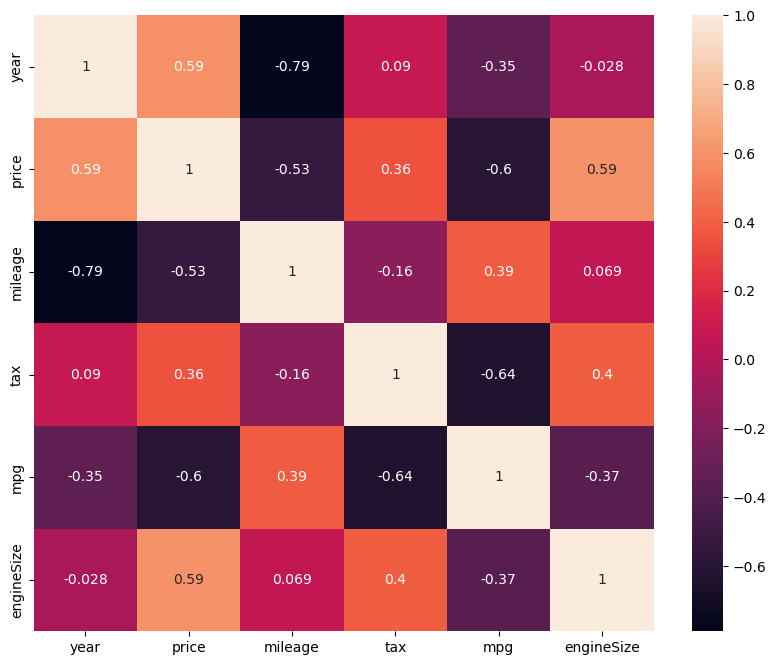

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

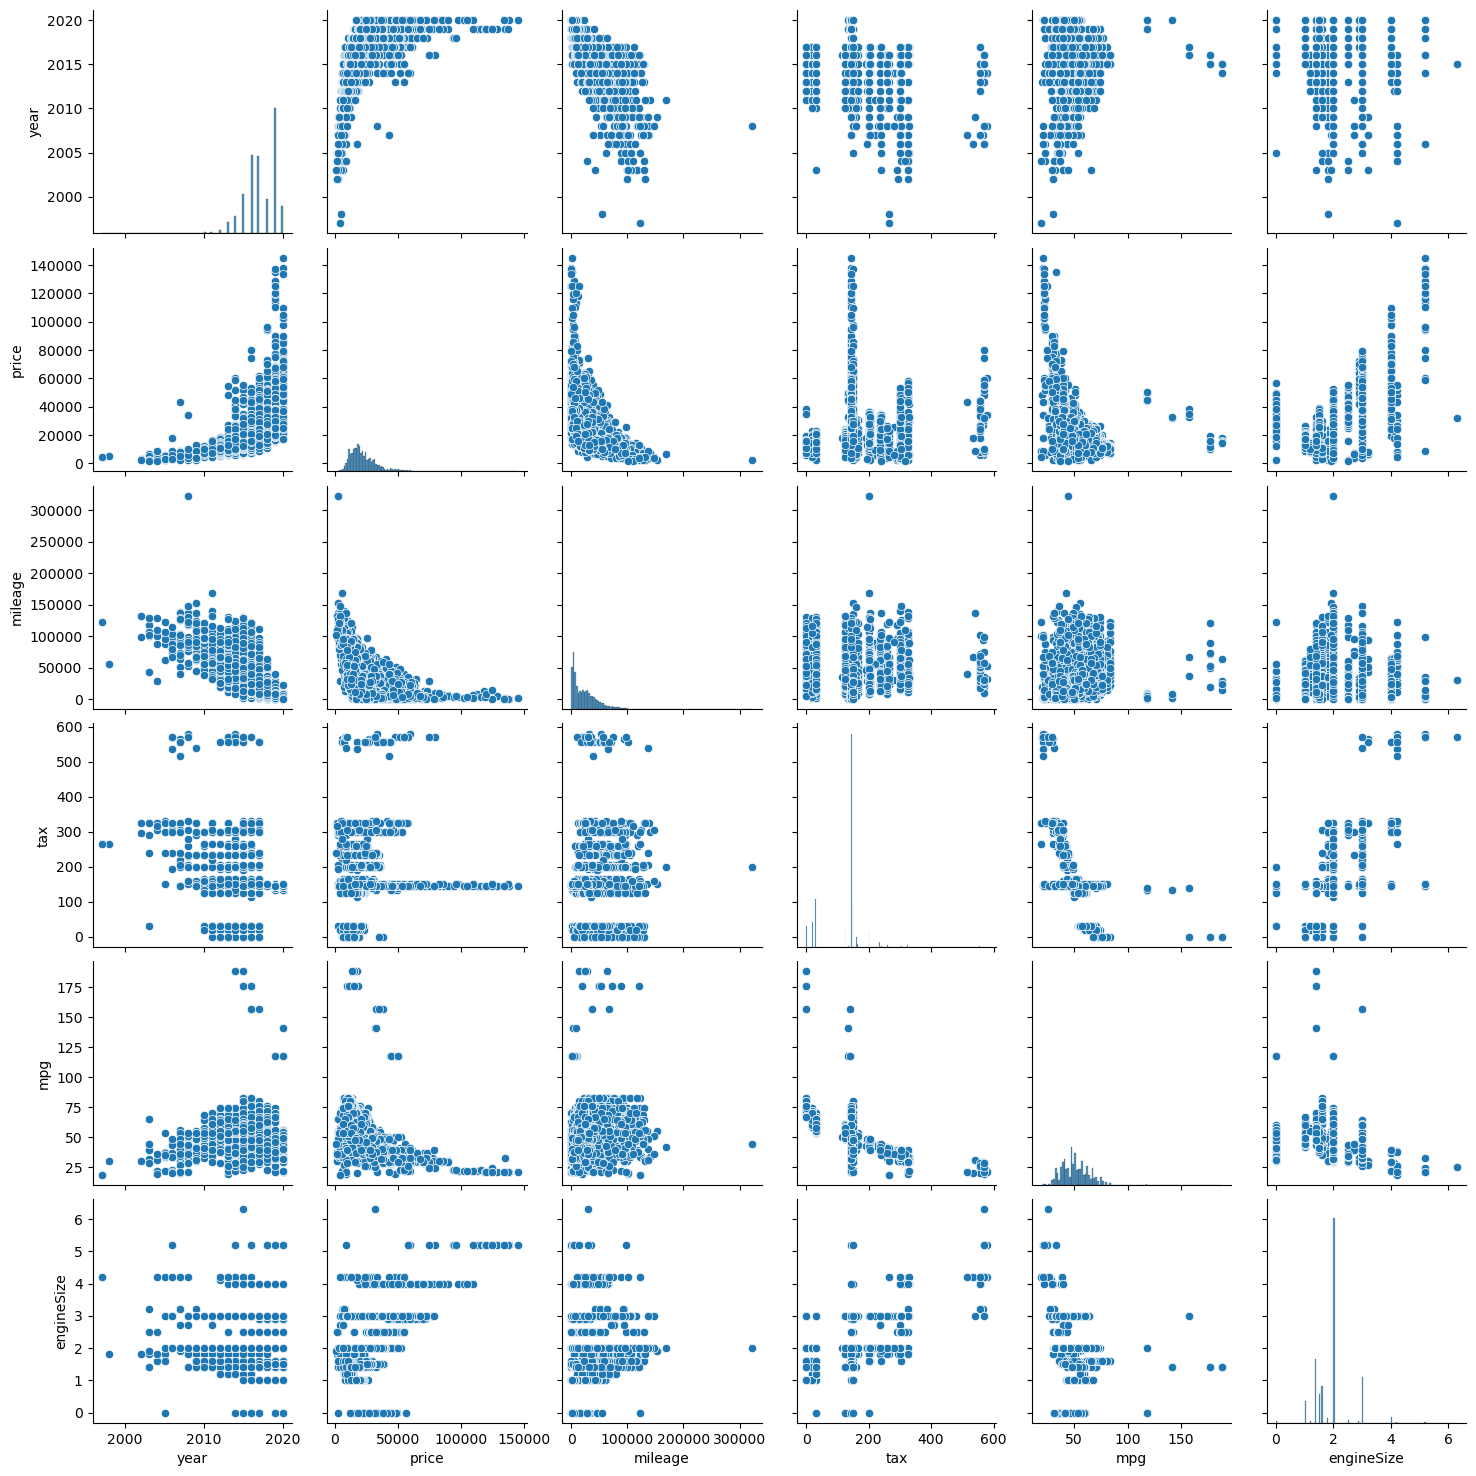

In [27]:
plt.figure(figsize=(15, 10))
sns.pairplot(df)
plt.show()

### Data Pre-Processing

In [ ]:
# Feature Engineering
df["age_of_car"] = 2021 - df["year"]
df = df.drop(columns=["year"])

In [28]:
# Encoding variables
df1 = pd.get_dummies(df)

In [29]:
# Standardizing variables
std = StandardScaler()
df_std = std.fit_transform(df1)
df_std = pd.DataFrame(df_std, columns = df1.columns)

In [30]:
df_std.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ SQ5,model_ SQ7,model_ TT,model_A4,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,-0.039002,-0.883253,-0.393254,0.357402,0.351966,-0.884062,2.627169,-0.009729,-0.470818,-0.386645,...,-0.038945,-0.027528,-0.18124,-0.009729,-0.582997,1.203038,-0.714096,-1.049397,-0.051549,1.054988
1,-0.500425,-0.542030,0.479662,-1.571222,1.030836,0.111173,-0.380638,-0.009729,-0.470818,-0.386645,...,-0.038945,-0.027528,-0.18124,-0.009729,1.715274,-0.831229,-0.714096,0.952929,-0.051549,-0.947878
2,-0.500425,-1.011212,0.212815,-1.422867,0.351966,-0.884062,2.627169,-0.009729,-0.470818,-0.386645,...,-0.038945,-0.027528,-0.18124,-0.009729,-0.582997,1.203038,-0.714096,-1.049397,-0.051549,1.054988
3,-0.039002,-0.516438,0.042479,0.283224,1.269983,0.111173,-0.380638,-0.009729,-0.470818,2.586354,...,-0.038945,-0.027528,-0.18124,-0.009729,1.715274,-0.831229,-0.714096,0.952929,-0.051549,-0.947878
4,0.883845,-0.473785,-0.979108,0.283224,-0.095471,-1.547551,-0.380638,-0.009729,2.123962,-0.386645,...,-0.038945,-0.027528,-0.18124,-0.009729,-0.582997,1.203038,-0.714096,-1.049397,-0.051549,1.054988


### Data Modelling

In [31]:
# Splitting dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(df_std.drop(columns=['price']), df_std[['price']])

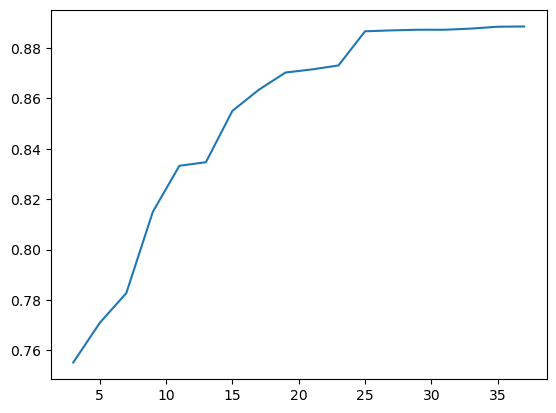

In [32]:
# Selecting best features for model
column_names = df_std.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range (3, 39, 2):
    selector = SelectKBest(f_regression, k = k)
    X_train1 = selector.fit_transform(X_train, y_train)
    X_test1 = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train1, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train1, y_train))
    r_squared_test.append(regressor.score(X_test1, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
plt.show()

Observation:-  Using SelectKBest() on f_regression, setting k as 25 will give us the best variables out of the 39 from the dataset with a score of 0.89

In [38]:
selector = SelectKBest(f_regression, k = 25)
X_train1 = selector.fit_transform(X_train, y_train)
X_test1 = selector.transform(X_test)
column_names[selector.get_support()]

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ A1', 'model_ A3',
       'model_ A4', 'model_ A7', 'model_ A8', 'model_ Q5', 'model_ Q7',
       'model_ Q8', 'model_ R8', 'model_ RS3', 'model_ RS4', 'model_ RS5',
       'model_ RS6', 'model_ SQ5', 'model_ SQ7', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Petrol'],
      dtype='object')

### Training Models

In [34]:
models = {
    'LinearRegression':LinearRegression(),
    'LinearSVR':SVR(),
    'Ridge':Ridge(),
    'RandomForestRegressor':RandomForestRegressor(),
    'MLPRegression':MLPRegressor()
}

### Evaluating Models

In [37]:
model_results = []
model_names = []
model_r2 = []

for name, model in models.items():
    a = model.fit(X_train1 ,y_train)
    predicted = a.predict(X_test1)
    score = np.sqrt(MSE(y_test, predicted))
    scores = r2_score(y_test, predicted)
    model_results.append(score)
    model_names.append(name)
    model_r2.append(scores)
    
    df_results = pd.DataFrame([model_names,model_results,model_r2])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE',2:'R2'}).sort_values(by='RMSE',ascending=False)
    df_results.reset_index(drop=True, inplace=True)
    
df_results

,Model,RMSE,R2
0,Ridge,0.317647,0.897226
1,LinearRegression,0.317429,0.897368
2,LinearSVR,0.243696,0.939509
3,MLPRegression,0.21857,0.95134
4,RandomForestRegressor,0.20537,0.95704


Observation:- A Decision Tree Regression is the best algorithm for this model with a RMSE of .20 and a R2 score of .96

In [39]:
treeregr = RandomForestRegressor()
treeregr.fit(X_train1, y_train)
y_pred = treeregr.predict(X_test1)
mse = MSE(y_test, y_pred)
print("RMSE using DecisionTreeRegression:", np.sqrt(mse))
print("R2 using DecisionTreeRegression:", r2_score(y_test, y_pred))

RMSE using DecisionTreeRegression: 0.20543939134224684
R2 using DecisionTreeRegression: 0.95701082014168
